<a href="https://colab.research.google.com/github/marizethpb/Data-Analysis/blob/main/Consumption_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Regression Analysis**

Measuring the effect of Per Capita Permanent Income, Uncertainty Index, Property Income / Real Housing Prices, Per Capita Government Expenditure, on Household Consumption

Importing the necessary libraries

In [26]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


Reading the data from an CSV file and putting it on a Dataframe

In [27]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Consumption2015-2023(2).csv")
df = pd.DataFrame(data)
df.head()

,PCHC,PC_PermanentIncome,Uncertainty Index,Property_income,Per Capita Gov't expenditure,Real_HP,Incomesqrd,real_hp(inverse),log_property,log_govt,loguncer
0,2695933,33132.27902,0.151895,18104,4743.749235,134.4341,1.097748e+09,0.007439,4.257775,3.676122,-0.818456808
1,2636266,30227.93912,0.236686,20362,4110.246398,137.4626,9.137283e+08,0.007275,4.308820,3.613868,-0.625826696
2,3111056,34670.69021,0.209790,26168,3769.785155,140.3737,1.202057e+09,0.007124,4.417771,3.576317,-0.678214803
3,2777972,30972.63735,0.565885,24406,4358.755345,144.8195,9.593043e+08,0.006905,4.387497,3.639362,-0.247271664
4,2898169,35261.87702,0.115393,24094,5338.214896,150.6483,1.243400e+09,0.006638,4.381909,3.727396,-0.937818654


Renaming some columns to shorten names and remove spaces


In [28]:
df.rename(columns = {"Per Capita Gov't expenditure":'GOVT'}, inplace = True)
df.rename(columns = {"Uncertainty Index":'UI'}, inplace = True)

Performing the Multiple Regression with Per Capita Household Consumption as the dependent variable and Permanent Income, Property Income, Real Housing Prices, and Government Expenditure as independent variables


In [29]:
reg1 = smf.ols("PCHC~PC_PermanentIncome+UI+Property_income+Real_HP+GOVT",data = df).fit()

The model is statistically significant and 4 out of 5 variables (all independent variable except uncertainty index) have significant effect on Real Household Consumption

In [30]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCHC   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           9.50e-18
Time:                        04:29:08   Log-Likelihood:                -387.86
No. Observations:                  31   AIC:                             787.7
Df Residuals:                      25   BIC:                             796.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -9.975e+05   3.33e+05     -2.992      0.006   -1.68e+06   -3.11e+05
PC_PermanentIncome    85.6305      6.246     13.709      0.000      72.766      98.495
UI                  1.424e+05   1.17e+05      1.214      0.236   -9.92e+04    3.84e+05
Property_income        6.3943      1.470      4.351      0.000       3.368       9.421
Real_HP             1.021e+04   2133.393      4.784      0.000    5812.476    1.46e+04
GOVT                -137.0860     17.446     -7.858      0.000    -173.016    -101.156
==============================================================================
Omnibus:                        3.483   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.566
Skew:                          -0.028   Prob(JB):                        0.277
Kurtosis:                       4.408   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Making the residuals vs Fitted scatter plot manually by putting the residuals and predicted values on variables and visualizing it.

In [31]:
residuals = reg1.resid
print(residuals)

0      -2848.472006
1      41922.198843
2      26596.887312
3       6120.023321
4    -100070.351691
5     -66224.052919
6       5093.559006
7     -11835.135024
8     -92408.919008
9     -40389.037375
10    -35520.415544
11     73189.588204
12    -20663.996580
13    -53639.609452
14     71950.477733
15     33459.414580
16     -1949.217673
17    -88541.151000
18      9599.917773
19     27418.436966
20     53397.262100
21     57483.160394
22     11209.946563
23     70640.789205
24   -175261.460924
25    -42965.714334
26     13439.425156
27    186860.628377
28     50077.750685
29    -11486.034875
30      5344.102187
dtype: float64


In [32]:
predicted = reg1.predict()
print(predicted)

[2698781.47200633 2594343.8011566  3084459.11268821 2771851.97667929
 2998239.35169097 2894361.05291884 3314089.44099383 2955325.13502433
 3165822.91900756 3023834.03737466 3562999.41554412 3041611.41179622
 3284536.99657978 3202357.60945169 3650741.52226741 3275288.58541978
 3447657.21767255 3425782.15100049 3926159.08222653 3287193.56303384
 2864339.7378996  2972602.83960555 3637712.0534372  3086168.2107951
 3305392.46092385 3288518.71433421 3909184.57484417 3284896.37162309
 3346804.24931538 3516993.03487543 4190727.89781317]


There is a data point that is relative far from the rest so I may need to do hypothesis testing using 5% significance to validate if the model is linear.

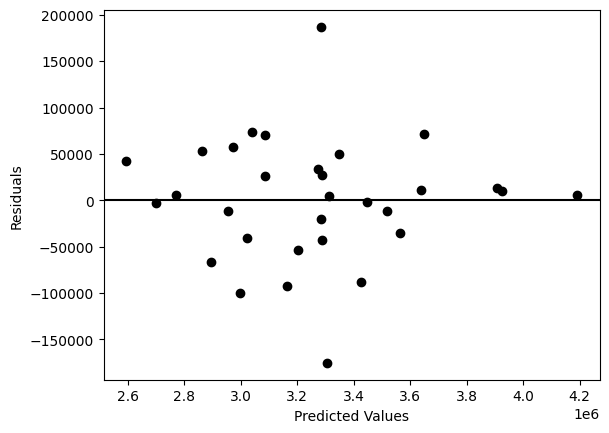

In [33]:
plt.scatter(reg1.predict(), residuals, color = 'black');
plt.axhline(0, color='black')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');


Validating the Residuals vs Fitted by harvey-collier test and rainbow test

Harvey Collier Test has a bug as it breaks when the independent variable is more than 3

In [34]:
sms.diagnostic.linear_harvey_collier(reg1)

TtestResult(statistic=nan, pvalue=nan, df=nan)

Manually editing the paramaters of Harvey Collier Test as it only assumes less or equal to 3 independent variables (syntax from Stack Overflow)

According to Harvey Collier Test, the model is linear.

In [35]:
res = reg1
skip = len(res.params)  # bug in linear_harvey_collier
rr = sms.recursive_olsresiduals(res, skip=skip, alpha=0.95, order_by=None)
stats.ttest_1samp(rr[3][skip:], 0)


TtestResult(statistic=2.031155959867866, pvalue=0.053456038845114795, df=24)

According to Rainbow Test, the model is linear.



In [36]:
sms.diagnostic.linear_rainbow(reg1)

(1.435439096025425, 0.29666473409815725)